In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

from utilities import Mask, Bp2f, plot_2d
import copy 

import seaborn as sea
import pandas as pd
from scipy.stats.mstats import gmean

%config Completer.use_jedi = False
%matplotlib inline

In [2]:
import pysm3
import pysm3.units as u

In [3]:
sea.set_style("white")
sea.set_context("talk")
sea.set_style("ticks")

# basic configuration

In [4]:
nside = 128

In [5]:
masked_index = np.load('/global/cscratch1/sd/jianyao/CBASS/SPASS_masked_index.npy')
mask_spass = np.load('/global/cscratch1/sd/jianyao/CBASS/mask_spass_%s.npy'%nside)
mask_spass[mask_spass!=1] = 0
mask_spass_512 = np.load('/global/cscratch1/sd/jianyao/CBASS/mask_spass_512.npy')

In [102]:
Sn_S = np.load('/global/cscratch1/sd/jianyao/CBASS/Results/s0_only_homo_noise/nside_128/SNR_smoothed_SPASS.npy')

In [5]:
masked_index.shape[0]

96145

In [8]:
masked_index.shape[0]/12/nside**2

0.4890187581380208

# one patch of sky

In [25]:
print('%02d'%9)

09


In [7]:
betas_i = np.load('/global/cscratch1/sd/jianyao/CBASS/Results/s0_only_homo_noise/nside_128/Dyne_As_betas_SPASS_128_%03d.npy'%0)

(array([  7.,   4.,   5.,   8.,   8.,   7.,   7.,  18.,  31.,  79., 137.,
        341., 251., 235., 220.,  90.,  29.,  14.,  17.,  17.]),
 array([-3.11099322, -3.10324202, -3.09549082, -3.08773961, -3.07998841,
        -3.07223721, -3.06448601, -3.0567348 , -3.0489836 , -3.0412324 ,
        -3.0334812 , -3.02572999, -3.01797879, -3.01022759, -3.00247639,
        -2.99472519, -2.98697398, -2.97922278, -2.97147158, -2.96372038,
        -2.95596917]),
 <BarContainer object of 20 artists>)

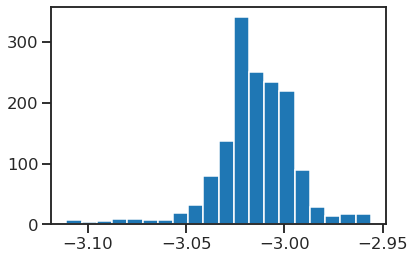

In [33]:
plt.hist(betas_i[2::4], bins = 20)

In [25]:
betas_i.shape

(6100,)

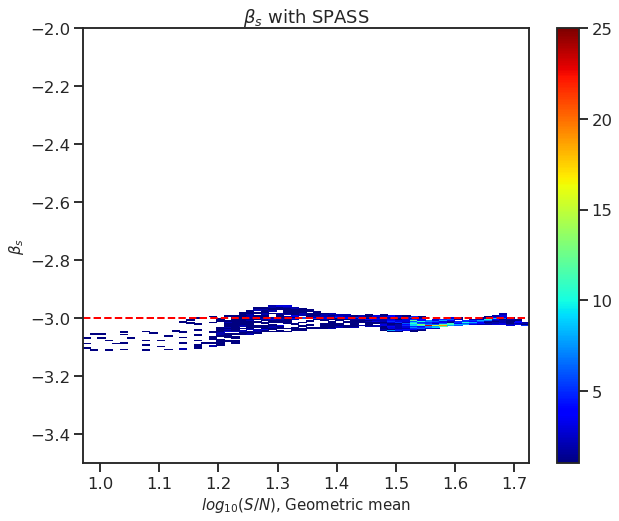

In [28]:
my_cmap = copy.copy(plt.cm.get_cmap("jet"))
my_cmap.set_under('w',0)
plt.figure(figsize = (10,8))
bins = plt.hist2d(np.log10(Sn_S[masked_index[0:1525]]), betas_i[2::4], bins = [60, 60], cmin = 1, cmap = my_cmap)
plt.hlines(-3.0, xmin = -1, xmax = 2, color = 'red', lw = 2, ls = '--')
plt.ylim(-3.5, -2)
plt.xlabel(r'$log_{10}(S/N)$, Geometric mean', fontsize = 15)
plt.ylabel(r'$\beta_s$', fontsize = 15)
plt.title(r'$\beta_s$ with SPASS')
plt.colorbar()

# different patches of one realization

In [9]:
nodes = 63

In [10]:
high_snr = np.load('/global/cscratch1/sd/jianyao/CBASS/Results/s0_only_homo_noise/nside_128/High_SNR_pixels_3000.npy')

In [105]:
mask_used = np.zeros(12*nside**2); betas = np.zeros(12*nside**2)
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17,18,19,20,21,22,23,24,25,26,27,28,29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
for i in indices:
    betas_i = np.load('/global/cscratch1/sd/jianyao/CBASS/Results/s0_only_homo_noise/nside_128/Dyne_As_betas_SPASS_128_%03d.npy'%i)
    betas[masked_index[1525*i:1525*(i+1)]]= betas_i[2::4]
    
betas[betas==0] = hp.UNSEEN

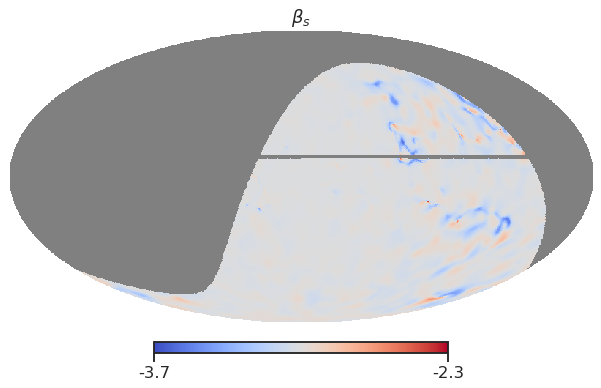

In [112]:
hp.mollview(betas, cmap = 'coolwarm', title = r'$\beta_s$', min = -3.7, max = -2.3)

In [107]:
sns_samples = np.log10(Sn_S[masked_index[0:1525*16]])
sns_samples = np.append(sns_samples, np.log10(Sn_S[masked_index[1525*17:1525*63]]))

betas_samples = betas[masked_index[0:1525*16]]
betas_samples = np.append(betas_samples, betas[masked_index[1525*17:1525*63]])

In [108]:
betas_samples.shape

(94550,)

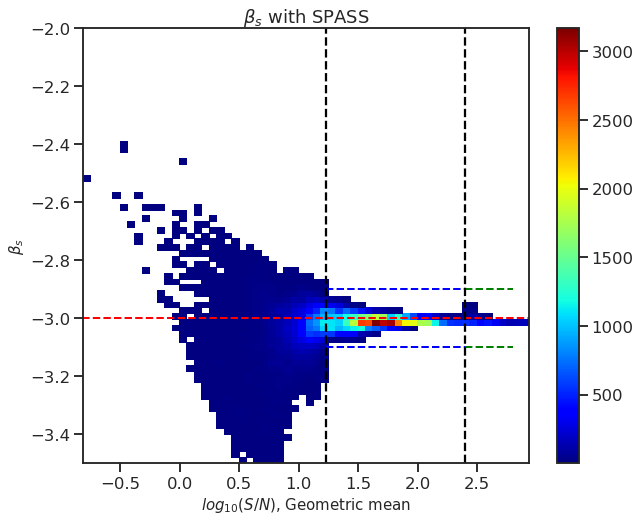

In [109]:
my_cmap = copy.copy(plt.cm.get_cmap("jet"))
my_cmap.set_under('w',0)
plt.figure(figsize = (10,8))
bins = plt.hist2d(sns_samples, betas_samples, bins = [60, 60], cmin = 1, cmap = my_cmap) # -70 for unhandled pixels
plt.hlines(-3.0, xmin = -1, xmax = 3, color = 'red', lw = 2, ls = '--')

plt.hlines(-2.9, xmin = 1.23, xmax = 2.40, color = 'blue', lw = 2, ls = '--')
plt.hlines(-3.1, xmin = 1.23, xmax = 2.40, color = 'blue', lw = 2, ls = '--')

plt.hlines(-2.9, xmin = 2.40, xmax = 2.80, color = 'green', lw = 2, ls = '--')
plt.hlines(-3.1, xmin = 2.40, xmax = 2.80, color = 'green', lw = 2, ls = '--')

plt.vlines(2.40, ymin = -3.5, ymax = -2.0, color = 'black', ls = '--')
plt.vlines(1.23, ymin = -3.5, ymax = -2.0, color = 'black', ls = '--')
plt.ylim(-3.5, -2)
plt.xlabel(r'$log_{10}(S/N)$, Geometric mean', fontsize = 15)
plt.ylabel(r'$\beta_s$', fontsize = 15)
plt.title(r'$\beta_s$ with SPASS')
plt.colorbar()

# correct SNR distribution

(array([2.0000e+00, 4.0000e+00, 1.0000e+01, 2.0000e+01, 6.3000e+01,
        2.5200e+02, 6.0900e+02, 1.3880e+03, 3.2800e+03, 7.0230e+03,
        1.5040e+04, 1.4611e+04, 1.6937e+04, 1.5823e+04, 9.8960e+03,
        5.8100e+03, 2.0990e+03, 1.8000e+03, 9.9200e+02, 4.8600e+02]),
 array([-0.81629432, -0.62864879, -0.44100327, -0.25335775, -0.06571223,
         0.1219333 ,  0.30957882,  0.49722434,  0.68486986,  0.87251538,
         1.06016091,  1.24780643,  1.43545195,  1.62309747,  1.81074299,
         1.99838852,  2.18603404,  2.37367956,  2.56132508,  2.7489706 ,
         2.93661613]),
 <BarContainer object of 20 artists>)

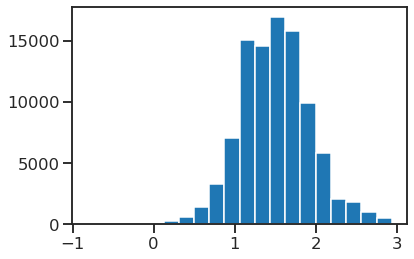

In [32]:
plt.hist(np.log10(Sn_S[masked_index]), bins = 20)

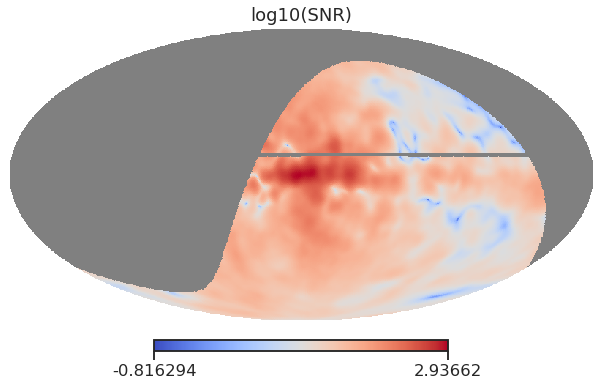

In [113]:
snr = np.log10(Sn_S)
snr[masked_index[1525*16:1525*17]] = hp.UNSEEN
hp.mollview(Mask((snr), mask_spass), cmap = 'coolwarm',title = 'log10(SNR)')

In [47]:
np.sort(np.log10(Sn_S)[masked_index])[::-1][0:3000]

array([2.93661613, 2.93536268, 2.93502213, ..., 2.39935413, 2.39931262,
       2.39930606])

In [46]:
np.sort(np.log10(Sn_S)[masked_index])[::-1][3000:70000]

array([2.39928926, 2.39920107, 2.39918061, ..., 1.23026151, 1.2302472 ,
       1.23024648])

# Real data

In [167]:
beta_s_0 = np.load('/global/cscratch1/sd/jianyao/Data/Results/Dyne_As_betas_SPASS_128_000.npy')[2::4]
beta_s_1 = np.load('/global/cscratch1/sd/jianyao/Data/Results/v2_Dyne_As_betas_SPASS_128_000.npy')[2::4]

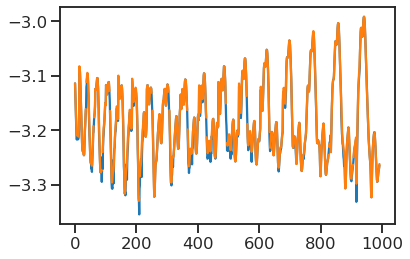

In [171]:
beta_s_0[beta_s_0 == 1024] = np.nan
plt.plot(beta_s_1)
plt.plot(beta_s_0)

In [6]:
mask_index_real = np.load('/global/cscratch1/sd/jianyao/Data/mask_com_smo_128_index.npy')
mask_index = np.append(mask_index_real, np.ones(142, dtype = np.int64)*14220)

In [7]:
mask_com = np.load('/global/cscratch1/sd/jianyao/Data/mask_com_smo_128.npy')

In [48]:
beta_s_i = np.load('/global/cscratch1/sd/jianyao/Data/Results/Dyne_As_betas_SPASS_128_014_salloc.npy')[2::4]

In [128]:
test_1 = np.load('/global/cscratch1/sd/jianyao/Data/Results/Dyne_As_betas_SPASS_128_014_slurm1.npy')[2::4]
test_2 = np.load('/global/cscratch1/sd/jianyao/Data/Results/Dyne_As_betas_SPASS_128_014_slurm2.npy')[2::4]
test_3 = np.load('/global/cscratch1/sd/jianyao/Data/Results/Dyne_As_betas_SPASS_128_014.npy')[2::4]

In [43]:
np.where(test_1 == 1024)

(array([ 18,  24,  32,  42,  45,  66, 114, 310, 312, 328, 330, 346, 349,
        353, 360, 442, 624, 627, 644, 657, 668, 678, 682, 683, 751, 936,
        940, 941, 958, 963, 969, 972]),)

In [44]:
np.where(test_2 == 1024)

(array([ 14,  19,  23,  44, 100, 106, 291, 301, 321, 326, 334, 337, 338,
        341, 350, 353, 633, 646, 648, 658, 663, 692, 753, 926, 934, 946,
        955, 956, 969, 976]),)

In [129]:
np.where(test_3 == 1024)

(array([  9,  41,  43,  46, 131, 322, 330, 331, 334, 338, 340, 353, 356,
        359, 361, 382, 409, 418, 442, 610, 612, 627, 629, 631, 650, 659,
        663, 668, 682, 753, 947, 955, 968, 978]),)

In [49]:
np.where(beta_s_i ==1024)

(array([  6,   8,  19,  23,  27,  28,  56, 115, 313, 319, 325, 334, 350,
        353, 371, 442, 615, 626, 627, 638, 639, 651, 662, 670, 865, 927,
        936, 937, 939, 951, 956, 961, 962, 964, 971, 977, 981]),)

In [40]:
np.where(abs(test_1 - test_2) == 0)

(array([353, 969]),)

In [52]:
mask_index[14*992:15*992][353]

160995

In [159]:
mask_index[14*992:15*992][969]

162012

In [31]:
beta_s_i[0:10]

array([-3.2237309 , -3.23967232, -3.25319898, -3.26385832, -3.27094884,
       -3.27398659,         nan, -3.26834446,         nan, -3.25298697])

In [32]:
test_i[0:10]

array([-3.22394641, -3.23979699, -3.25302639, -3.26382055, -3.27077337,
       -3.2739518 , -3.27279967, -3.26825917, -3.26115997, -3.25307142])

In [37]:
test_2[0:10]

array([-3.2239179 , -3.23965702, -3.25311955, -3.26392124, -3.27085617,
       -3.27386306, -3.27279786, -3.26832865, -3.26115603, -3.25301101])

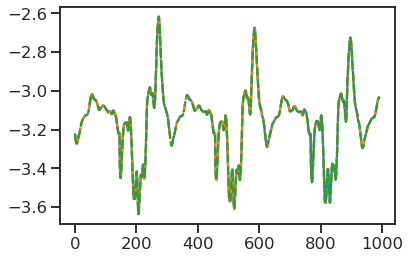

In [132]:
test_1[np.where(test_1 == 1024)] = np.nan
test_2[np.where(test_2 == 1024)] = np.nan
test_3[np.where(test_3 == 1024)] = np.nan


# beta_s_i[np.where(beta_s_i == 1024)] = np.nan

plt.plot(test_1)
plt.plot(test_2, '--')
plt.plot(test_3, '--')

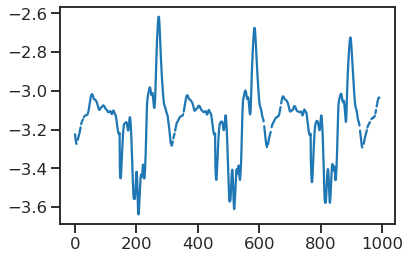

In [29]:
plt.plot(beta_s_i)

In [16]:
mask_index[14*992:(14+1)*992][np.where(test_i == 1024)]

array([160458, 160464, 160472, 160482, 160485, 160506, 160554, 160952,
       160954, 160970, 160972, 160988, 160991, 160995, 161002, 161084,
       161467, 161470, 161487, 161500, 161511, 161521, 161525, 161526,
       161594, 161979, 161983, 161984, 162001, 162006, 162012, 162015])

In [17]:
mask_index[14*992:(14+1)*992][np.where(beta_s_i == 1024)]

array([160446, 160448, 160459, 160463, 160467, 160468, 160496, 160555,
       160955, 160961, 160967, 160976, 160992, 160995, 161013, 161084,
       161458, 161469, 161470, 161481, 161482, 161494, 161505, 161513,
       161908, 161970, 161979, 161980, 161982, 161994, 161999, 162004,
       162005, 162007, 162014, 162020, 162024])

In [14]:
np.where(test_i == 1024)

(array([ 18,  24,  32,  42,  45,  66, 114, 310, 312, 328, 330, 346, 349,
        353, 360, 442, 624, 627, 644, 657, 668, 678, 682, 683, 751, 936,
        940, 941, 958, 963, 969, 972]),)

In [15]:
np.where(beta_s_i == 1024)

(array([  6,   8,  19,  23,  27,  28,  56, 115, 313, 319, 325, 334, 350,
        353, 371, 442, 615, 626, 627, 638, 639, 651, 662, 670, 865, 927,
        936, 937, 939, 951, 956, 961, 962, 964, 971, 977, 981]),)

In [8]:
beta_s = np.zeros(12*128**2); sigma_s = np.zeros(12*128**2)

for i in range(42):
    beta_s_i = np.load('/global/cscratch1/sd/jianyao/Data/Results/v3_Dyne_As_betas_SPASS_128_%03d.npy'%(i))
    beta_s[mask_index[i*992:(i+1)*992]] = beta_s_i[2::4]
    sigma_s[mask_index[i*992:(i+1)*992]] = beta_s_i[3::4]
    
beta_s[beta_s==0] = hp.UNSEEN
# beta_s[beta_s==1024] = hp.UNSEEN

sigma_s[sigma_s == 0] = hp.UNSEEN
# sigma_s[sigma_s == 1024] = hp.UNSEEN

index_eff = np.where(beta_s[mask_index_real] != hp.UNSEEN)
beta_s_eff  = beta_s[mask_index_real][index_eff[0]]

Text(0, 0.5, 'Number density')

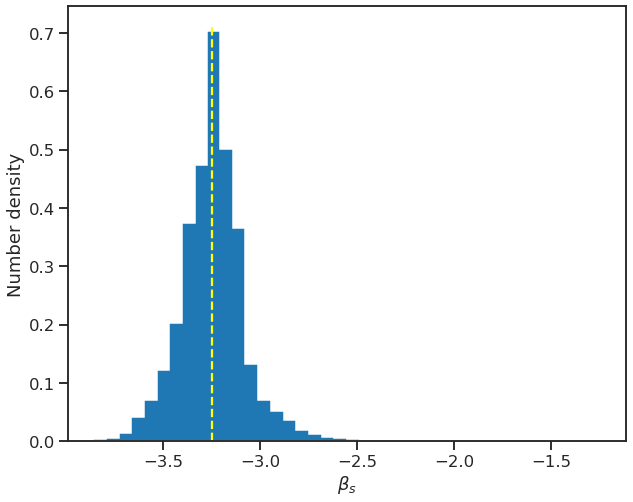

In [9]:
weights = -beta_s_eff/len(beta_s_eff)
plt.figure(figsize = (10, 8))
plt.hist(beta_s_eff, bins = 40, histtype='stepfilled', weights = weights)
plt.vlines(x = -3.25, ymin = 0, ymax = 0.71, colors = 'yellow', linestyles='dashed')
plt.xlabel(r'$\beta_s$')
plt.ylabel('Number density')

Text(0, 0.5, 'Number density')

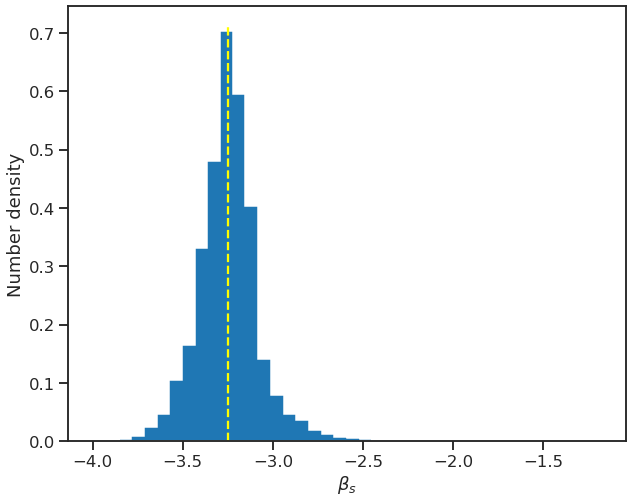

In [24]:
weights = -beta_s_eff/len(beta_s_eff)
plt.figure(figsize = (10, 8))
plt.hist(beta_s_eff, bins = 40, histtype='stepfilled', weights = weights)
plt.vlines(x = -3.25, ymin = 0, ymax = 0.71, colors = 'yellow', linestyles='dashed')
plt.xlabel(r'$\beta_s$')
plt.ylabel('Number density')

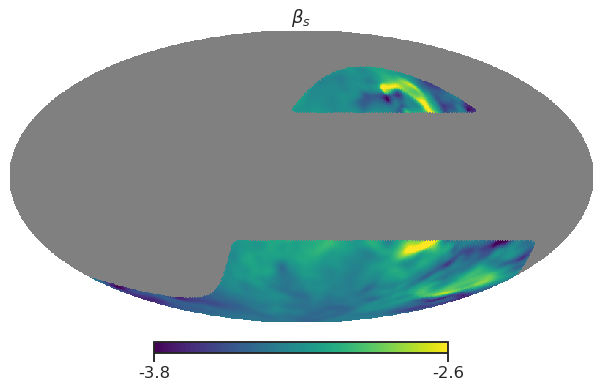

In [10]:
hp.mollview(beta_s, cmap = 'viridis', title = r'$\beta_s$', min = -3.8, max = -2.6)

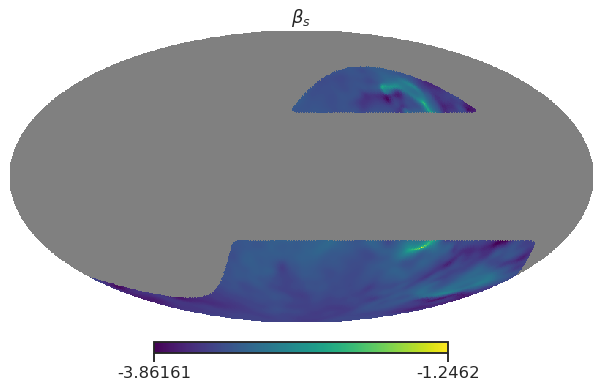

In [23]:
hp.mollview(beta_s, cmap = 'viridis', title = r'$\beta_s$')

<ipython-input-24-cc98cf4af47a>:1: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(sigma_s), cmap = 'viridis', title = r'$log_{10}(\sigma{(\beta_s)})$')


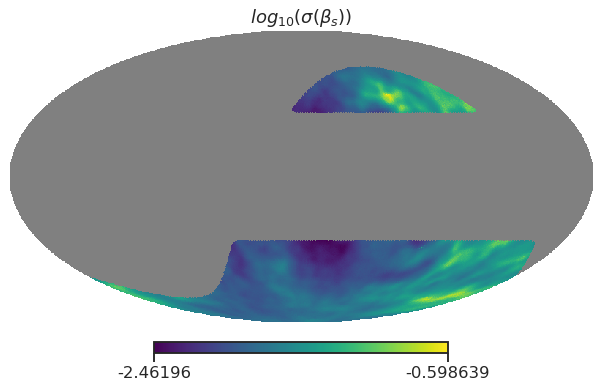

In [24]:
hp.mollview(np.log10(sigma_s), cmap = 'viridis', title = r'$log_{10}(\sigma{(\beta_s)})$')

## read output

In [377]:
errors = []
for i in range(42):
    with open("/global/cscratch1/sd/jianyao/Data/sbatch/output_50413245_%s.out"%i, "r") as txt_file:
        lines = txt_file.readlines()
        for line in lines:
            if 'First' in line:
                errors.append(line[13:-1])

In [383]:
error_index = np.array(errors, dtype = np.int64)

In [392]:
sigma_s[error_index] = sigma_s[error_index] / 10

<ipython-input-395-cc98cf4af47a>:1: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(sigma_s), cmap = 'viridis', title = r'$log_{10}(\sigma{(\beta_s)})$')


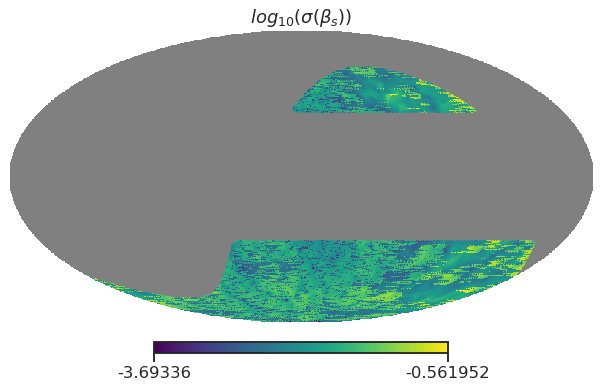

In [395]:
hp.mollview(np.log10(sigma_s), cmap = 'viridis', title = r'$log_{10}(\sigma{(\beta_s)})$')

## SNR

In [20]:
snr = np.load('/global/cscratch1/sd/jianyao/Data/SNR_gmean_smoothed_128_v2.npy')

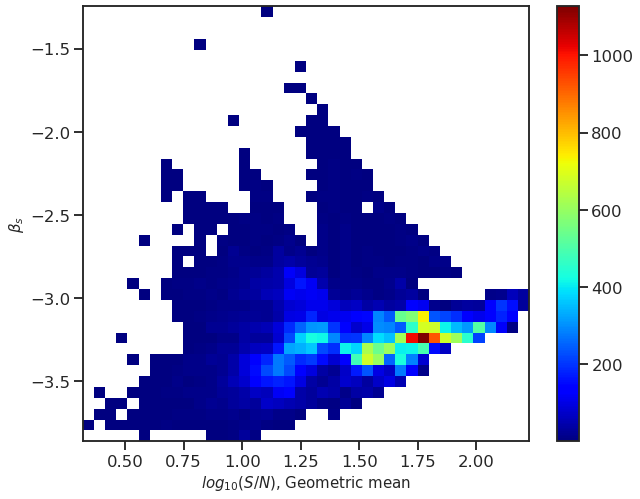

In [21]:
my_cmap = copy.copy(plt.cm.get_cmap("jet"))
my_cmap.set_under('w',0)
plt.figure(figsize = (10,8))
plt.hist2d(np.log10(snr[mask_index_real]),beta_s[mask_index_real], bins = [40, 40], cmap = my_cmap, cmin = 1)
plt.xlabel(r'$log_{10}(S/N)$, Geometric mean', fontsize = 15)
plt.ylabel(r'$\beta_s$', fontsize = 15)
plt.colorbar()

# comparision with PYSM

In [6]:
template_dir = '/global/project/projectdirs/cmb/www/pysm-data/pysm_2/'
beta_s_pysm = hp.read_map(template_dir+'synch_beta.fits')

In [7]:
beta_s_pysm_128 = hp.ud_grade(beta_s_pysm, nside_out = 128)

In [17]:
infos = np.ones((41664*2, 3), dtype = 'object')
infos[:,0] = np.append(beta_s[mask_index], beta_s_pysm_128[mask_index])
infos[0:41664, 1] = 'SPASS'; infos[41664:, 1] = 'pysm'
infos[:,2] = 'v3'

data = pd.DataFrame(infos, columns = ['betas', 'names', 'version'])
data['betas'] = data['betas'].astype('float64')
data['names'] = data['names'].astype('category')
data['version'] = data['version'].astype('category')

In [18]:
data

,betas,names,version
0,-3.092510,SPASS,v3
1,-3.104786,SPASS,v3
2,-3.116257,SPASS,v3
3,-3.130944,SPASS,v3
4,-3.141322,SPASS,v3
...,...,...,...
83323,-3.095011,pysm,v3
83324,-3.095011,pysm,v3
83325,-3.095011,pysm,v3
83326,-3.095011,pysm,v3


<AxesSubplot:xlabel='version', ylabel='betas'>

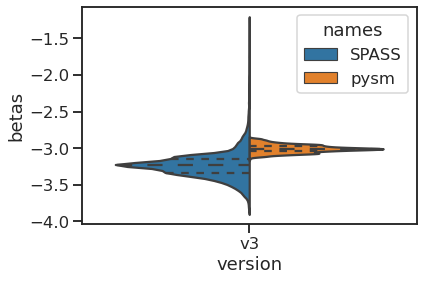

In [19]:
sea.violinplot(y = 'betas', hue = 'names',  x = 'version', data = data, split=True, scale="count", inner="quartile")

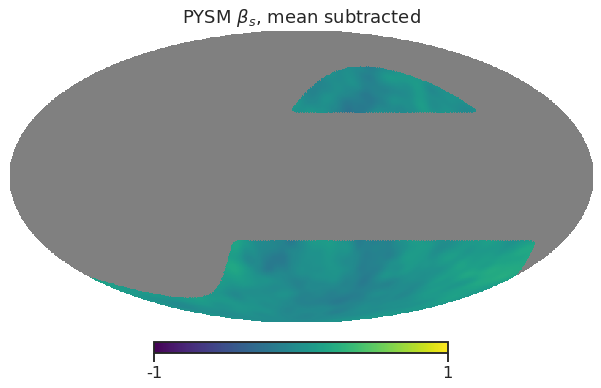

In [29]:
pysm_mean = np.mean(beta_s_pysm_128[mask_index_real])
hp.mollview(Mask((beta_s_pysm_128 - pysm_mean)*1.6, mask_com), cmap = 'viridis', min = -1, max = 1, title = r'PYSM $\beta_s$, mean subtracted')

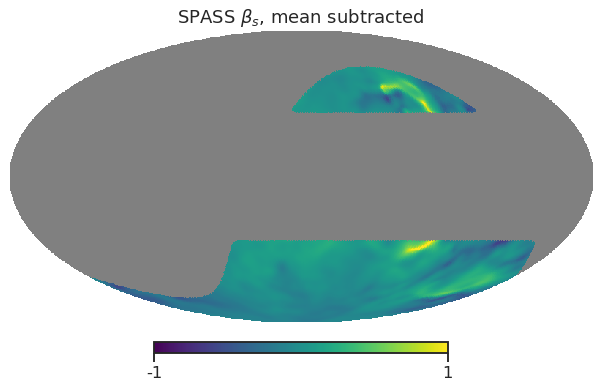

In [30]:
my_mean = np.mean(beta_s[mask_index_real])
hp.mollview(Mask(beta_s - my_mean, mask_com), cmap = 'viridis', min = -1, max = 1, title = r'SPASS $\beta_s$, mean subtracted')

In [8]:
np.corrcoef(beta_s[mask_index], beta_s_pysm_128[mask_index])

array([[1.        , 0.06311888],
       [0.06311888, 1.        ]])

In [12]:
beta_s_pysm_128 = Mask(beta_s_pysm_128, mask_com)

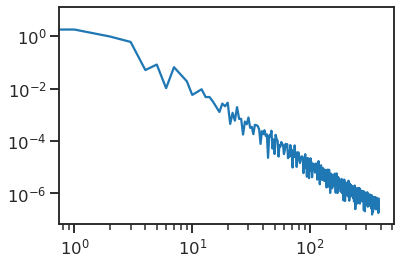

In [16]:
plt.loglog(hp.anafast(beta_s, beta_s_pysm_128))

(-4.0, -2.0)

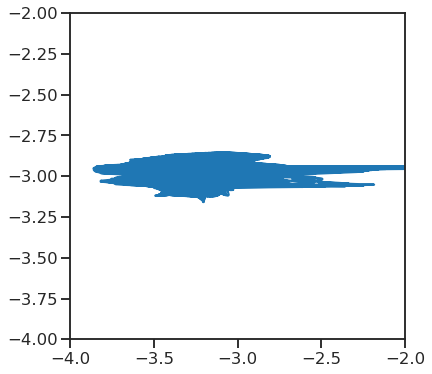

In [31]:
plt.figure(figsize = (6,6))
plt.plot(beta_s[mask_index], beta_s_pysm_128[mask_index])
plt.xlim(-4, -2)
plt.ylim(-4, -2)

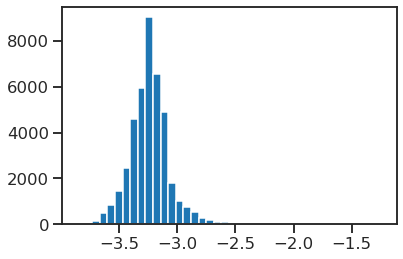

In [33]:
bins = plt.hist(beta_s[mask_index_real], bins = 40)[1]

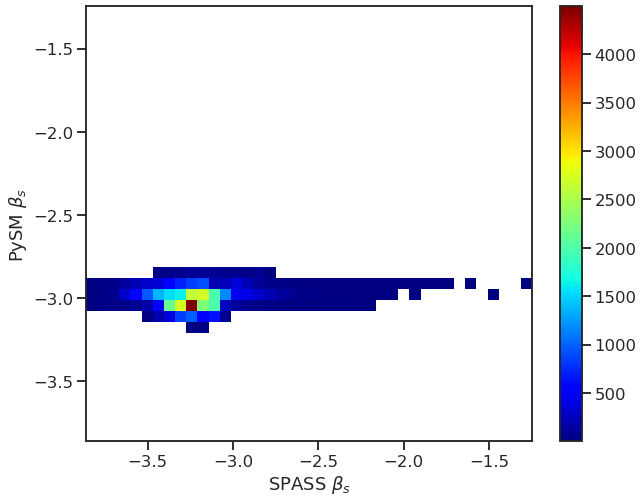

In [34]:
my_cmap = copy.copy(plt.cm.get_cmap("jet"))
my_cmap.set_under('w',0)
plt.figure(figsize = (10, 8))
plt.hist2d(beta_s[mask_index_real], beta_s_pysm_128[mask_index_real], bins = bins, cmin = 1, cmap = my_cmap)
plt.xlabel(r'SPASS $\beta_s$')
plt.ylabel(r'PySM $\beta_s$')
plt.colorbar()

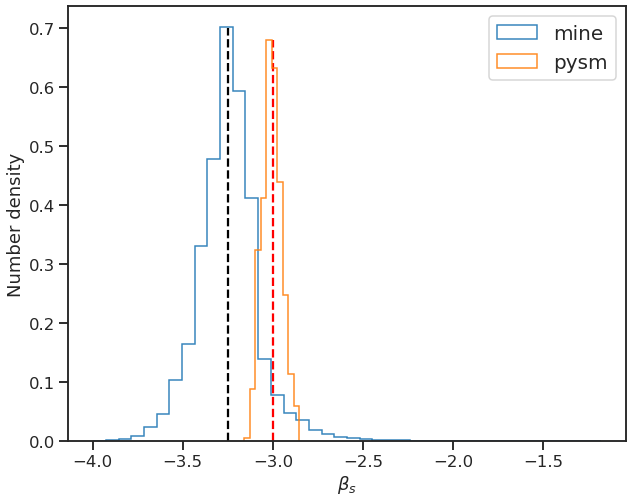

In [326]:
plt.figure(figsize = (10, 8))

weights = -beta_s_eff/len(beta_s_eff)
plt.hist(beta_s_eff, bins = 40, histtype='step', weights = weights, alpha = 0.9, label = 'mine')
plt.vlines(x = -3.25, ymin = 0, ymax = 0.7, colors = 'black', linestyles='dashed')

weights = -beta_s_pysm_128[mask_index]/len(beta_s_pysm_128[mask_index])
plt.hist(beta_s_pysm_128[mask_index], bins = 10, histtype='step', weights = weights, alpha = 0.9, label = 'pysm')
plt.vlines(x = -3.0, ymin = 0, ymax = 0.68, colors = 'red', linestyles='dashed')
plt.xlabel(r'$\beta_s$')
plt.ylabel('Number density')
plt.legend(fontsize = (20))

# plot

In [45]:
import dynesty
from dynesty import utils as dyfunc
from dynesty import plotting as dyplot

In [63]:
results = np.load('/global/cscratch1/sd/jianyao/Data/Results/chains/pixel_45250.npy', allow_pickle=True)

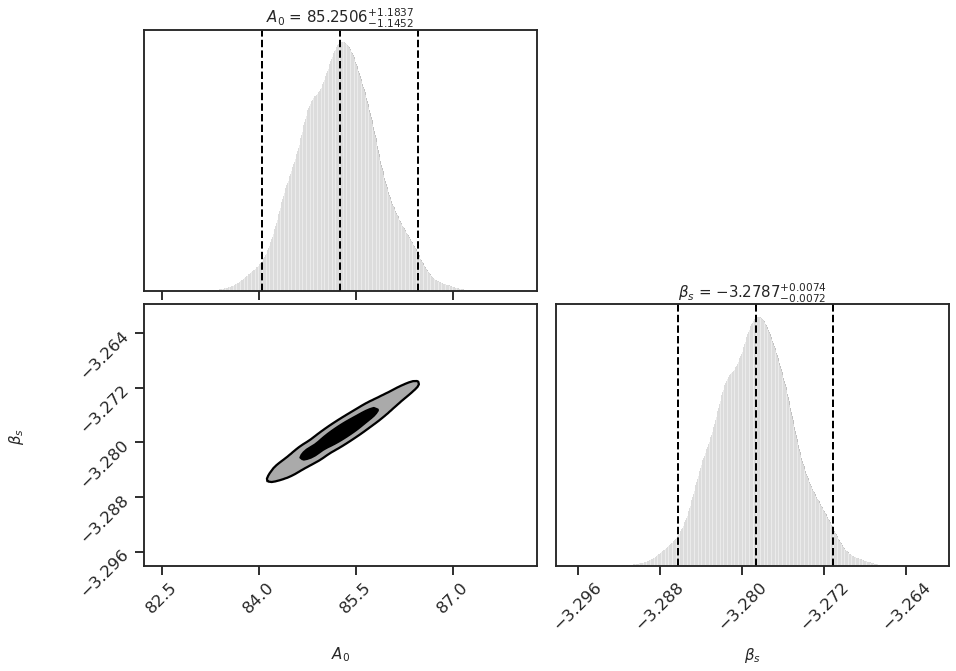

In [64]:
labels = ['$A_0$', r'$\beta_s$']; 
npara = 2; sig1 = [0.16, 0.5, 0.84]; sig2 = [0.021, 0.5, 0.979];
fig, axes = plt.subplots(npara, npara, figsize=(15, 10))
axes = axes.reshape((npara, npara)) 

fig, ax = dyplot.cornerplot(results.item(), fig = (fig, axes), title_fmt='.4f', title_kwargs = {'fontsize':15},show_titles=True,
                 labels = labels, label_kwargs = {'fontsize':15}, quantiles = sig2, quantiles_2d = [0.4,0.85]) #0.1, 0.4, 0.65, 0.85

In [166]:
try:
    2/0
except:
    try:
        print('first error')
        print(2/0)
    except Exception as e: 
        print(e)
        print('second')

first error
division by zero
second
